In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [105]:
fer_df = pd.read_csv("./fer2013/fer2013.csv")
fer_new_df = pd.read_csv("./fer2013/fer2013new.csv")

In [106]:
fer_df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [107]:
fer_new_df.head()

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0


In [108]:
def img_visualizer(df, row_index, rows=1, cols=1):
    
    if type(row_index) != list:
        row_index = [row_index]
    assert len(row_index) == rows*cols,"number row index list must be equal to number of rows time number of columns"
    
    n = 0
    fig, axs = plt.subplots(rows, cols)
    for i in range(1,rows*cols+1):
            pixels = df["pixels"][row_index[n]]
            img = np.array(pixels.split(' '),dtype='int').reshape((48,48))
            plt.subplot(rows, cols, i)
            plt.imshow(img,cmap='gray')
            plt.axis('off')
            plt.title(df["emotion"][row_index[n]])
            n+=1

In [110]:
df = pd.concat([fer_df,fer_new_df],axis=1)
df.drop(["Usage",'Image name'],axis=1,inplace=True)

emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 
            4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

df['emotion'] = df.apply(lambda x: emotions[x['emotion']],axis=True)

# cleaning dataset from Not Face images

In [111]:
d = df.sort_values(by='NF',ascending=False)['NF']
d.unique()

array([10,  4,  2,  1,  0])

In [112]:
print("number of images with score NF=10 is ",df[df['NF'] == 10].shape[0])
print("number of images with score NF=4 is ",df[df['NF'] == 4].shape[0])
print("number of images with score NF=2 is ",df[df['NF'] == 2].shape[0])
print("number of images with score NF=1 is ",df[df['NF'] == 1].shape[0])

number of images with score NF=10 is  176
number of images with score NF=4 is  2
number of images with score NF=2 is  4
number of images with score NF=1 is  167


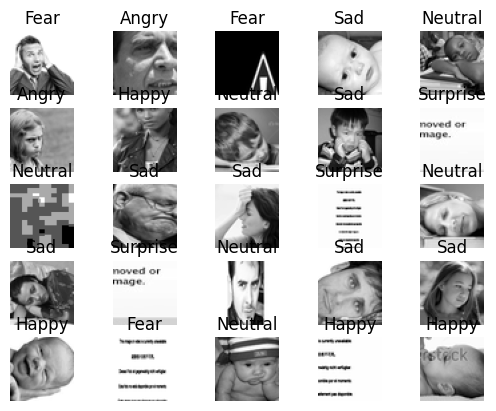

In [113]:
d = df[df['NF'] == 10].head(25).index
img_visualizer(df,list(d), 5,5)

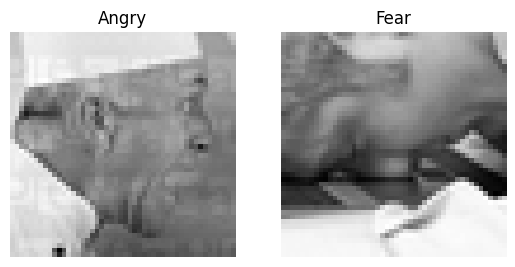

In [114]:
d = df[df['NF'] == 4].index
img_visualizer(df,list(d), 1,2)

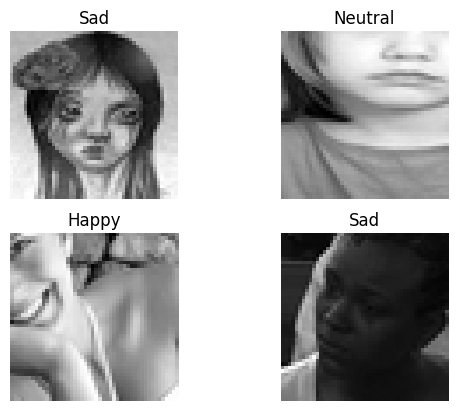

In [115]:
d = df[df['NF'] == 2].index
img_visualizer(df,list(d), 2,2)

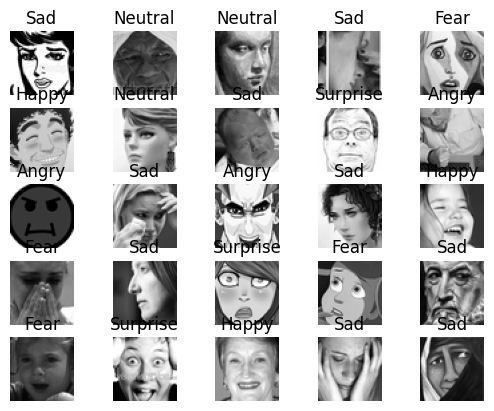

In [116]:
d = df[df['NF'] == 1].head(25).index
img_visualizer(df,list(d), 5,5)

In [117]:
df = df[df["NF"] == 0]
df.shape

(35538, 12)

In [118]:
df["unknown"].unique()

array([0, 2, 1, 4, 3, 5, 6, 7, 8])

In [119]:
print("number of images with score unknown=8 is ",df[df['unknown'] == 8].shape[0])
print("number of images with score unknown=7 is ",df[df['unknown'] == 7].shape[0])
print("number of images with score unknown=6 is ",df[df['unknown'] == 6].shape[0])
print("number of images with score unknown=5 is ",df[df['unknown'] == 5].shape[0])
print("number of images with score unknown=4 is ",df[df['unknown'] == 4].shape[0])
print("number of images with score unknown=3 is ",df[df['unknown'] == 3].shape[0])
print("number of images with score unknown=2 is ",df[df['unknown'] == 2].shape[0])
print("number of images with score unknown=1 is ",df[df['unknown'] == 1].shape[0])

number of images with score unknown=8 is  3
number of images with score unknown=7 is  3
number of images with score unknown=6 is  18
number of images with score unknown=5 is  55
number of images with score unknown=4 is  224
number of images with score unknown=3 is  751
number of images with score unknown=2 is  2526
number of images with score unknown=1 is  8220


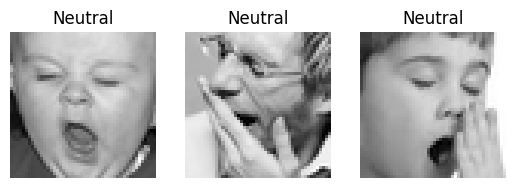

In [120]:
d = df[df["unknown"] == 8].index
img_visualizer(df,list(d), 1,3)

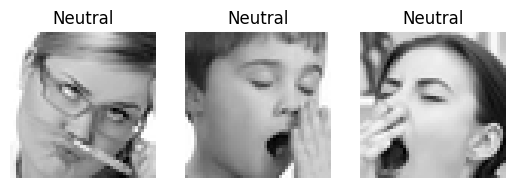

In [121]:
d = df[df["unknown"] == 7].index
img_visualizer(df,list(d), 1,3)

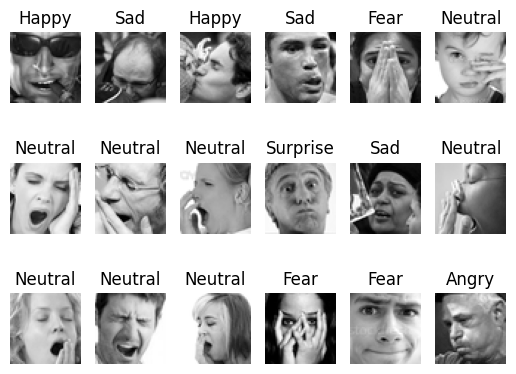

In [122]:
d = df[df["unknown"] == 6].index
img_visualizer(df,list(d), 3,6)

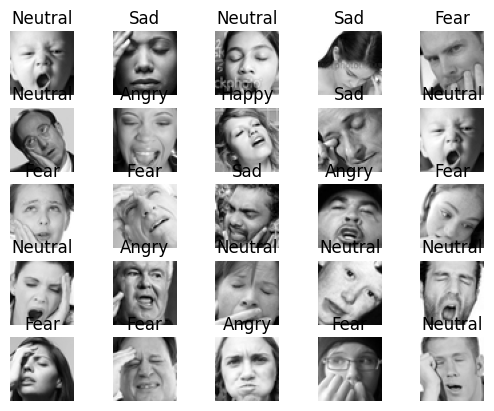

In [123]:
d = df[df["unknown"] == 5].head(25).index
img_visualizer(df,list(d), 5,5)

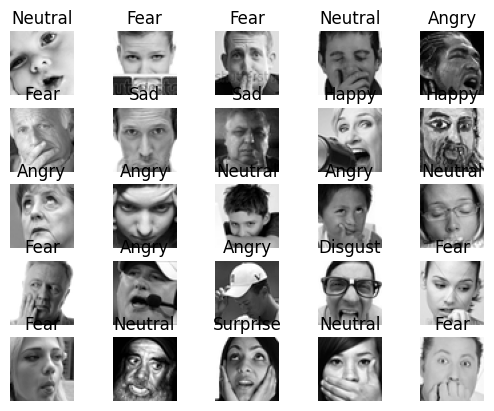

In [124]:
d = df[df["unknown"] == 4].head(25).index
img_visualizer(df,list(d), 5,5)

In [125]:
df = df[df["unknown"] < 5]
df.shape

(35459, 12)

In [145]:
df.head()

,emotion,pixels,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF,new_emotions
0,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,4,0,0,1,3,2,0,0,0,0,other
1,Angry,151 150 147 155 148 133 111 140 170 174 182 15...,6,0,1,1,0,0,0,0,2,0,nautral
2,Fear,231 212 156 164 174 138 161 173 182 200 106 38...,5,0,0,3,1,0,0,0,1,0,bored
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,4,0,0,4,1,0,0,0,1,0,bored
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,9,0,0,1,0,0,0,0,0,0,nautral


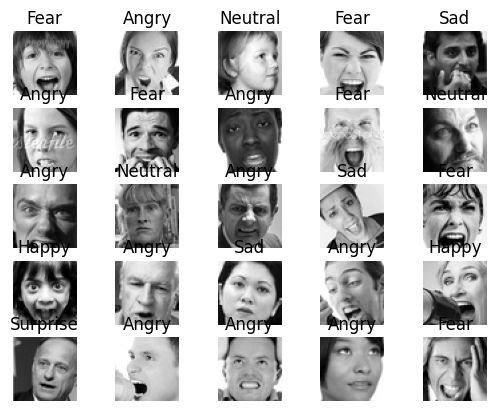

In [169]:
a = df[(df['surprise'] == df['happiness']) & (df['happiness'] != 0)].head(25).index
img_visualizer(df,list(a), 5,5)

In [255]:
def new_emotions(nautral,happy,surprise,sad,anger,disgust,fear):
    a1=np.greater(nautral, happy)
    a2=np.greater(nautral, surprise)
    a3=np.greater(nautral, sad)
    a4=np.greater(nautral, anger)
    a5=np.greater(nautral, disgust)
    a6=np.greater(nautral, fear)
    
    b1=np.greater(anger, happy)
    b2=np.greater(anger, surprise)
    b3=np.greater(anger, sad)
    b4=np.greater(anger, nautral)
    b5=np.greater(anger, disgust)
    b6=np.greater(anger, fear)

    if np.greater(anger,2) or (b1 and b2 and b3 and b4 and b5 and b6):    
        return "angry"
    if (a1 and a2 and a3 and a4 and a5 and a6) and(sad == 0):
        return "focused"
    if (a1 and a2 and a3 and a4 and a5 and a6):
        return "nautral"
    if (sad != 0) and (nautral != 0)and (fear == 0) and (happy == 0) and(anger < sad):
        return "bored"

    else:
        return "other"

In [256]:
new_ome = df.apply(lambda x:new_emotions(x['neutral'],x['happiness'],x['surprise'],x['sadness'],
                                         x['anger'],x['disgust'],x['fear']),axis=1)
df['new_emotions'] = new_ome
df

,emotion,pixels,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF,new_emotions
0,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,4,0,0,1,3,2,0,0,0,0,angry
1,Angry,151 150 147 155 148 133 111 140 170 174 182 15...,6,0,1,1,0,0,0,0,2,0,nautral
2,Fear,231 212 156 164 174 138 161 173 182 200 106 38...,5,0,0,3,1,0,0,0,1,0,nautral
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,4,0,0,4,1,0,0,0,1,0,bored
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,9,0,0,1,0,0,0,0,0,0,nautral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881,Angry,181 177 176 156 178 144 136 132 122 107 131 16...,5,0,0,3,0,0,0,0,2,0,nautral
35882,Neutral,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,8,0,0,2,0,0,0,0,0,0,nautral
35884,Angry,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,0,0,0,0,7,1,0,2,0,0,angry
35885,Happy,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,0,10,0,0,0,0,0,0,0,0,other


<AxesSubplot: xlabel='new_emotions', ylabel='count'>

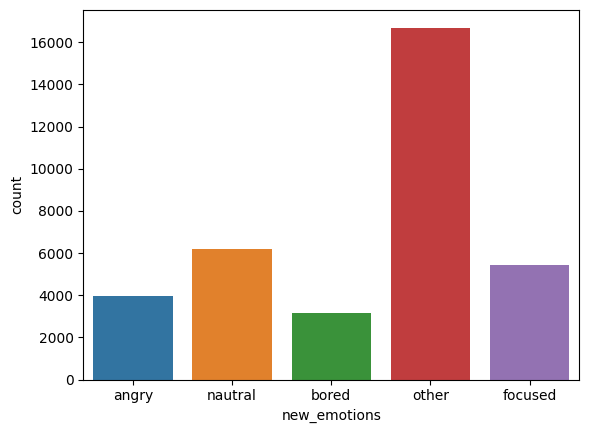

In [258]:
sns.countplot(data=df,x='new_emotions')

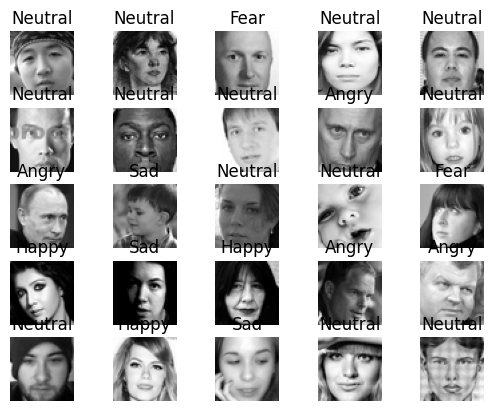

In [259]:
a = df[df['new_emotions'] == 'focused'].head(25).index
img_visualizer(df,list(a), 5,5)

<AxesSubplot: xlabel='emotion', ylabel='count'>

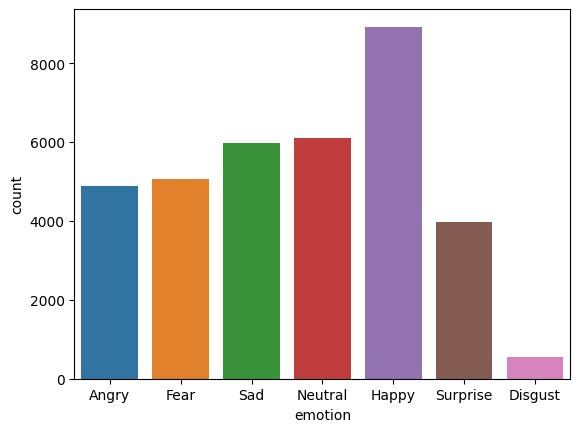

In [66]:
sns.countplot(data=df,x='emotion')

In [ ]:
fer_new["Usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [187]:
fer_new[fer_new['sadness'] == fer_new['neutral']].sort_values(by='neutral',ascending=False).head(10)

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
10299,Training,fer0010271.png,5,0,0,5,0,0,0,0,0,0
26005,Training,fer0025938.png,5,0,0,5,0,0,0,0,0,0
25407,Training,fer0025342.png,5,0,0,5,0,0,0,0,0,0
32145,PublicTest,fer0032067.png,5,0,0,5,0,0,0,0,0,0
12360,Training,fer0012325.png,5,0,0,5,0,0,0,0,0,0
25575,Training,fer0025510.png,5,0,0,5,0,0,0,0,0,0
12220,Training,fer0012187.png,5,0,0,5,0,0,0,0,0,0
12140,Training,fer0012107.png,5,0,0,5,0,0,0,0,0,0
12119,Training,fer0012086.png,5,0,0,5,0,0,0,0,0,0
25799,Training,fer0025733.png,5,0,0,5,0,0,0,0,0,0


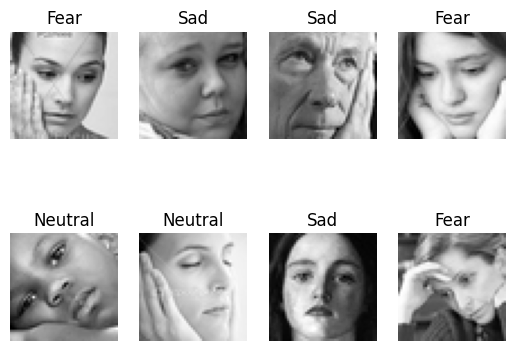

In [188]:
img_visualizer(train_df,[10299,26005,25407,12360,25575,25799,12220,12140],2,4)

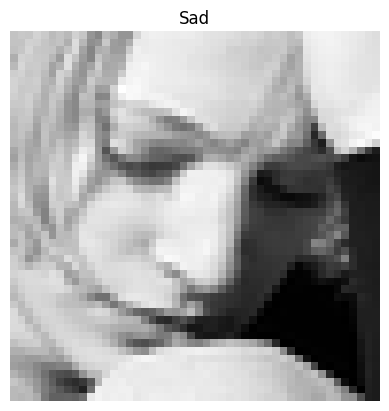

In [170]:
img_visualizer(fer_df,28638)

In [172]:
train_ndf = fer_new[fer_new["Usage"] == "Training"]
train_ndf.head()

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0


In [178]:
train_ndf.sort_values(by="NF").tail(8)

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
14148,Training,NaN,0,0,0,0,0,0,0,0,0,10
5478,Training,NaN,0,0,0,0,0,0,0,0,0,10
26897,Training,NaN,0,0,0,0,0,0,0,0,0,10
5439,Training,NaN,0,0,0,0,0,0,0,0,0,10
12465,Training,NaN,0,0,0,0,0,0,0,0,0,10
21320,Training,NaN,0,0,0,0,0,0,0,0,0,10
15975,Training,NaN,0,0,0,0,0,0,0,0,0,10
26860,Training,NaN,0,0,0,0,0,0,0,0,0,10


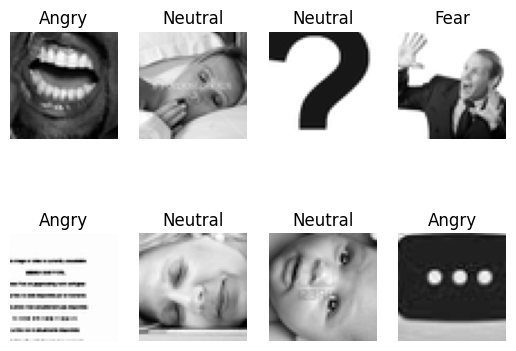

In [179]:
img_visualizer(train_df,[14148,5478,26897,21320,5439,12465,15975,26860],2,4)

In [181]:
train_ndf.sort_values(by="happiness").tail(8)

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
3335,Training,fer0003329.png,0,10,0,0,0,0,0,0,0,0
23431,Training,fer0023372.png,0,10,0,0,0,0,0,0,0,0
15181,Training,fer0015139.png,0,10,0,0,0,0,0,0,0,0
23425,Training,fer0023366.png,0,10,0,0,0,0,0,0,0,0
3338,Training,fer0003332.png,0,10,0,0,0,0,0,0,0,0
23419,Training,fer0023360.png,0,10,0,0,0,0,0,0,0,0
15202,Training,fer0015160.png,0,10,0,0,0,0,0,0,0,0
14354,Training,fer0014313.png,0,10,0,0,0,0,0,0,0,0


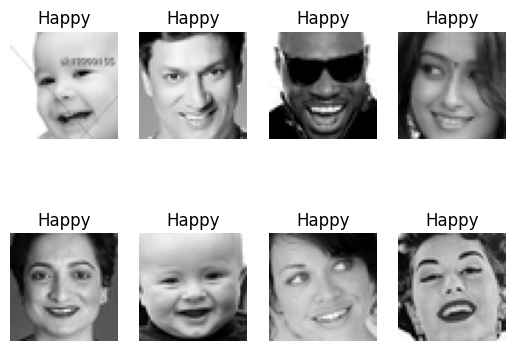

In [182]:
img_visualizer(train_df,[3335,23431,15181,14354,23425,3338,23419,15202],2,4)

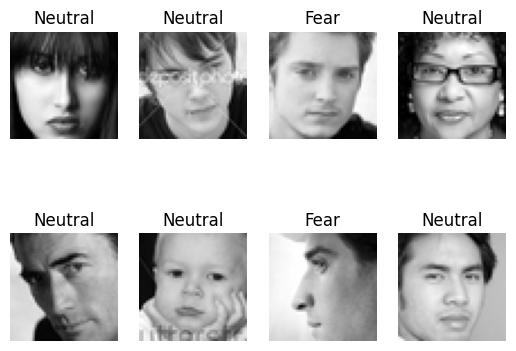

In [198]:
a = list(fer_new[fer_new['surprise'] == fer_new['happiness']].sort_values(by='neutral',ascending=False).head(8).index)
img_visualizer(fer_df,a,2,4)